In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
media_data = pd.read_csv('/content/drive/MyDrive/ML/project/media_cost.csv')

In [4]:
media_data.shape

(60428, 40)

In [5]:
media_data.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [6]:
# change the column name
media_data.rename(columns={
    'store_sales(in millions)': 'store_sales_millions',
    'store_cost(in millions)': 'store_cost_millions',
    'unit_sales(in millions)': 'unit_sales_millions',
    'avg_cars_at home(approx)': 'avg_cars_at home_approx',
    'avg. yearly_income': 'avg_yearly_income',
    'avg_cars_at home(approx).1': 'avg_cars_at_home_approx_1'
}, inplace=True)

In [7]:
media_data.head(5)

,food_category,food_department,food_family,store_sales_millions,store_cost_millions,unit_sales_millions,promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [8]:
media_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   food_category              60428 non-null  object 
 1   food_department            60428 non-null  object 
 2   food_family                60428 non-null  object 
 3   store_sales_millions       60428 non-null  float64
 4   store_cost_millions        60428 non-null  float64
 5   unit_sales_millions        60428 non-null  float64
 6   promotion_name             60428 non-null  object 
 7   sales_country              60428 non-null  object 
 8   marital_status             60428 non-null  object 
 9   gender                     60428 non-null  object 
 10  total_children             60428 non-null  float64
 11  education                  60428 non-null  object 
 12  member_card                60428 non-null  object 
 13  occupation                 60428 non-null  obj

In [9]:
media_data.dtypes.value_counts()

float64    23
object     17
Name: count, dtype: int64

In [10]:
media_data.columns[media_data.dtypes=='object']

Index(['food_category', 'food_department', 'food_family', 'promotion_name',
       'sales_country', 'marital_status', 'gender', 'education', 'member_card',
       'occupation', 'houseowner', 'avg_yearly_income', 'brand_name',
       'store_type', 'store_city', 'store_state', 'media_type'],
      dtype='object')

In [11]:
media_data.describe()

,store_sales_millions,store_cost_millions,unit_sales_millions,total_children,avg_cars_at home_approx,num_children_at_home,avg_cars_at_home_approx_1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,...,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,0.829351,2.200271,2.115258,13.806433,11.796289,...,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,1.303424,1.109644,0.932829,4.622693,4.682986,...,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,...,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,...,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,...,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,16.000000,...,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,...,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


# EDA


In [12]:
#missing values and percent
missing_values = media_data.isnull().sum()
missing_values_percent = missing_values / len(media_data) * 100
missing_values_df = pd.DataFrame({'Missing Values': missing_values, '(%)': missing_values_percent})
missing_values_df

,Missing Values,(%)
food_category,0,0.0
food_department,0,0.0
food_family,0,0.0
store_sales_millions,0,0.0
store_cost_millions,0,0.0
unit_sales_millions,0,0.0
promotion_name,0,0.0
sales_country,0,0.0
marital_status,0,0.0
gender,0,0.0


no missing values in any column

In [13]:
media_data.cost.describe()

count    60428.000000
mean        99.262366
std         30.011257
min         50.790000
25%         69.650000
50%         98.520000
75%        126.620000
max        149.750000
Name: cost, dtype: float64

##### univariate analysis

<Axes: xlabel='cost', ylabel='Density'>

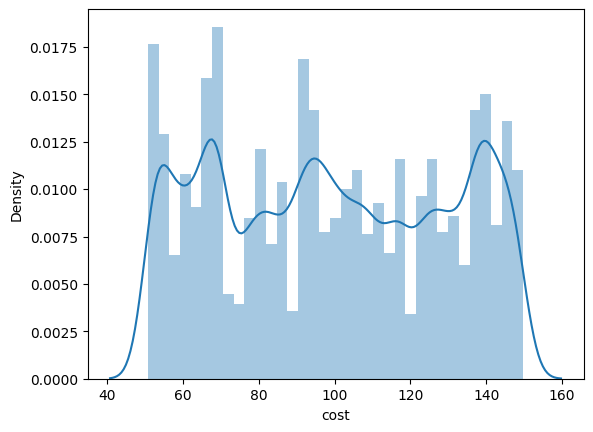

In [14]:
sns.distplot(media_data.cost)

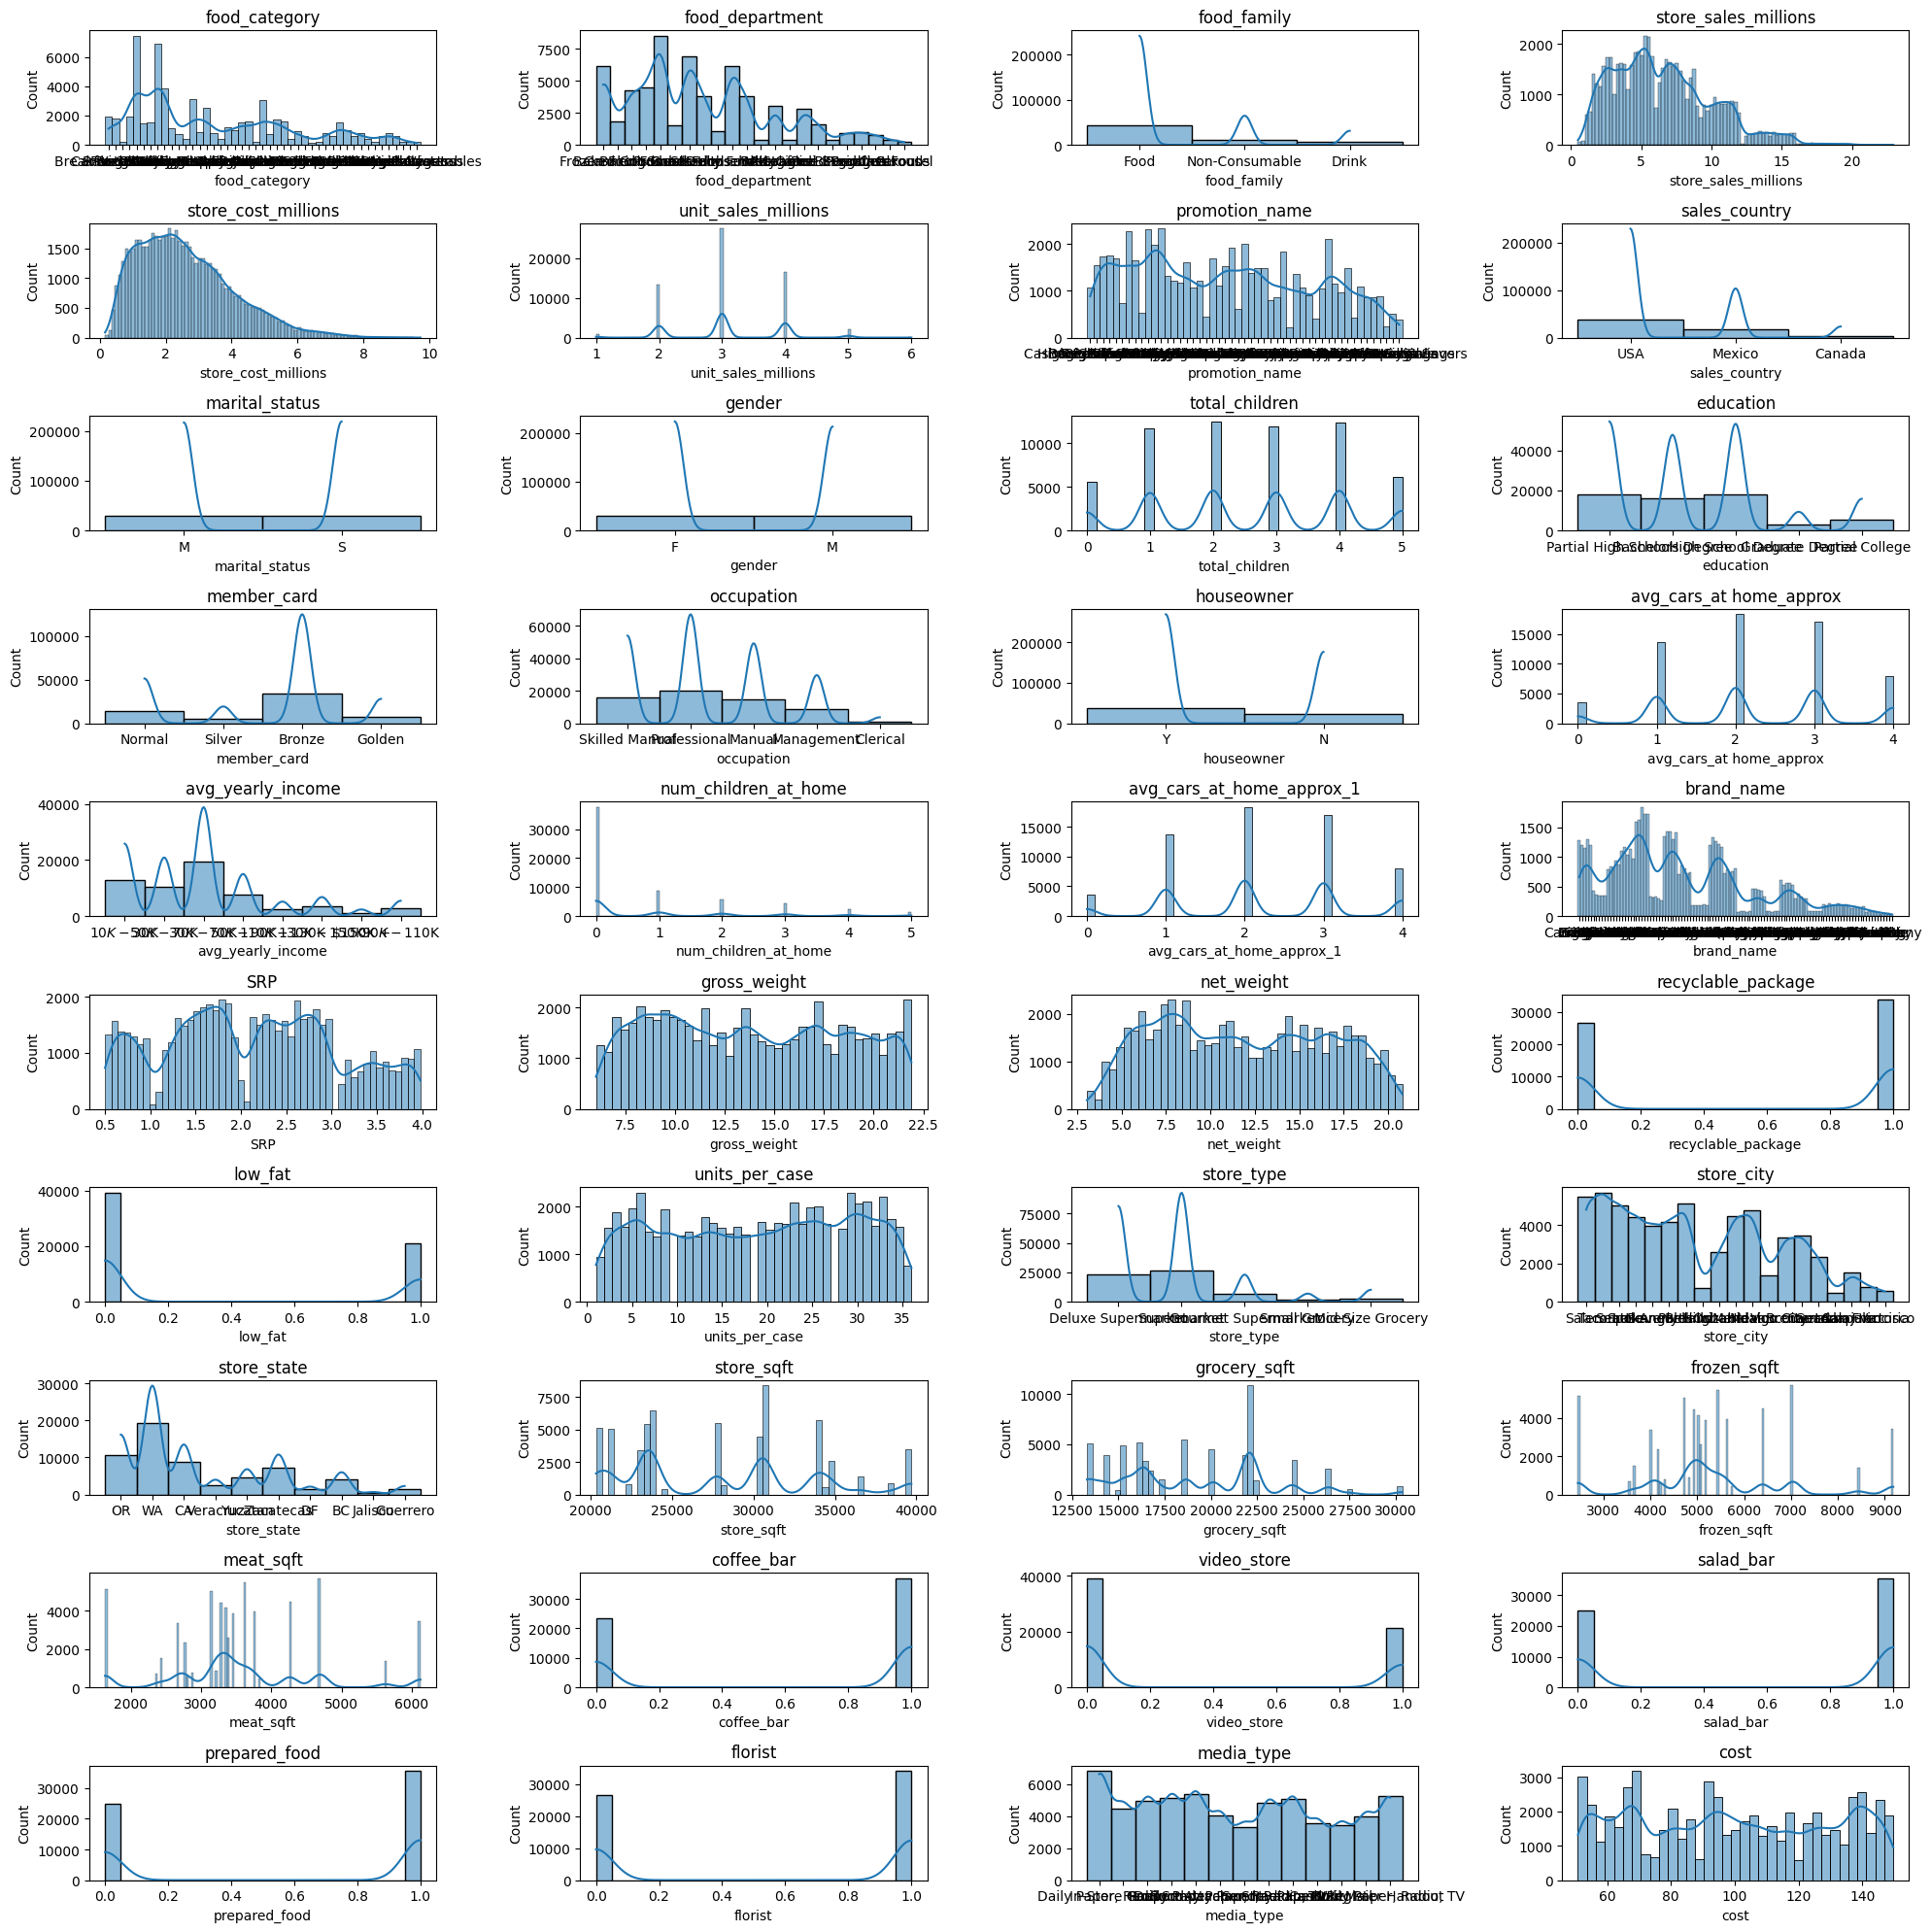

In [15]:
# histogram for all columns

fig, axes = plt.subplots(10, 4, figsize=(20, 20))
axes = axes.flatten()

for i, column in enumerate(media_data.columns):
    sns.histplot(media_data[column], ax=axes[i], kde=True)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

## food data on cost

In [16]:
## unique values in food_category
media_data.food_category.unique()

array(['Breakfast Foods', 'Bread', 'Canned Shrimp', 'Baking Goods',
       'Vegetables', 'Frozen Desserts', 'Candy', 'Snack Foods', 'Dairy',
       'Starchy Foods', 'Cleaning Supplies', 'Decongestants', 'Meat',
       'Hot Beverages', 'Jams and Jellies', 'Carbonated Beverages',
       'Seafood', 'Specialty', 'Kitchen Products', 'Electrical',
       'Beer and Wine', 'Candles', 'Fruit', 'Pure Juice Beverages',
       'Canned Soup', 'Paper Products', 'Canned Tuna', 'Eggs', 'Hardware',
       'Canned Sardines', 'Canned Clams', 'Pain Relievers', 'Side Dishes',
       'Bathroom Products', 'Magazines', 'Frozen Entrees', 'Pizza',
       'Cold Remedies', 'Canned Anchovies', 'Drinks', 'Hygiene',
       'Plastic Products', 'Canned Oysters', 'Packaged Vegetables',
       'Miscellaneous'], dtype=object)

In [17]:
## unique values in food_category
media_data.food_family.unique()

array(['Food', 'Non-Consumable', 'Drink'], dtype=object)

In [18]:
## unique values in food_category
media_data.food_department.unique()

array(['Frozen Foods', 'Baked Goods', 'Canned Foods', 'Baking Goods',
       'Produce', 'Snacks', 'Snack Foods', 'Dairy', 'Starchy Foods',
       'Household', 'Health and Hygiene', 'Meat', 'Beverages', 'Seafood',
       'Deli', 'Alcoholic Beverages', 'Canned Products', 'Eggs',
       'Periodicals', 'Breakfast Foods', 'Checkout', 'Carousel'],
      dtype=object)

In [19]:
food_category_group = media_data.groupby('food_category')['cost'].mean()

In [20]:
food_category_group.head()

food_category
Baking Goods          99.818382
Bathroom Products    100.031514
Beer and Wine         99.023063
Bread                 99.467997
Breakfast Foods       99.422138
Name: cost, dtype: float64

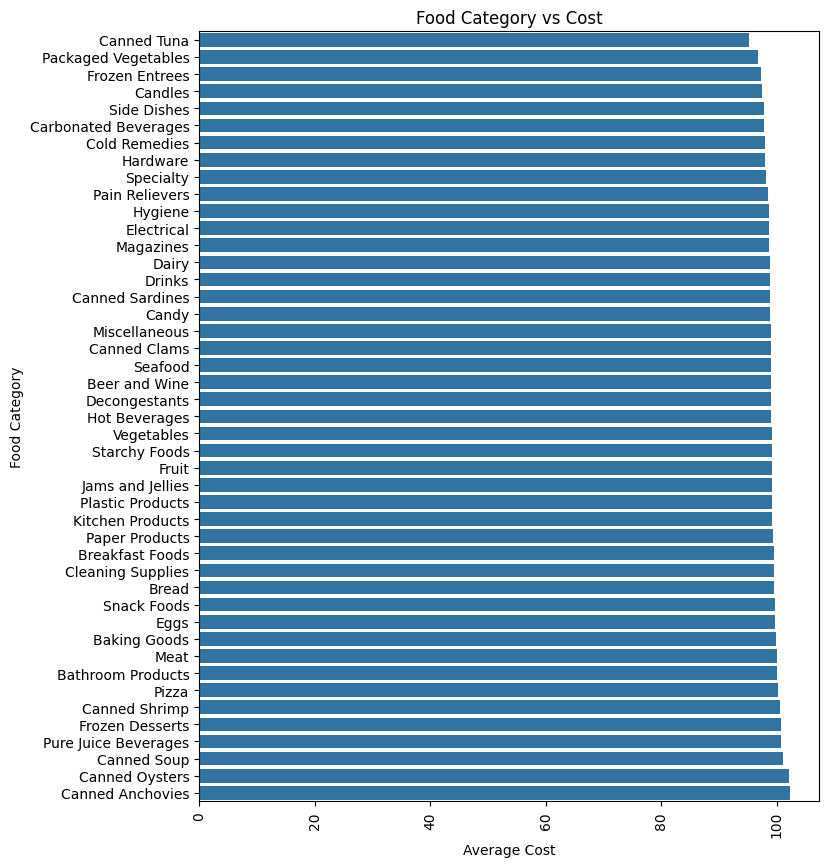

In [21]:
food_category_group = media_data.groupby('food_category')['cost'].mean().reset_index().sort_values(by='cost')

plt.figure(figsize=(8, 10))
sns.barplot(data=food_category_group, y="food_category", x="cost")
plt.xlabel("Average Cost")
plt.ylabel("Food Category")
plt.title("Food Category vs Cost")
plt.xticks(rotation=90)
plt.show()

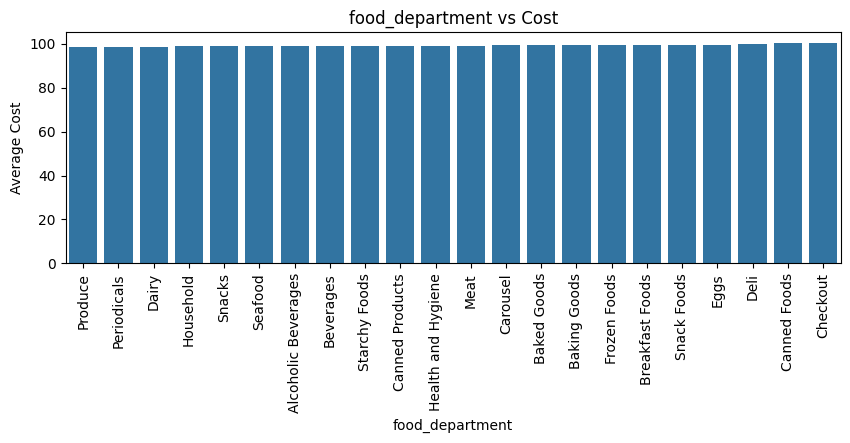

In [78]:
food_category_group = media_data.groupby("food_department")["cost"].mean().reset_index().sort_values(by='cost')

plt.figure(figsize=(10, 3))
sns.barplot(data=food_category_group, x="food_department", y="cost")
plt.xlabel("food_department")
plt.ylabel("Average Cost")
plt.title("food_department vs Cost")
plt.xticks(rotation=90)
plt.show()

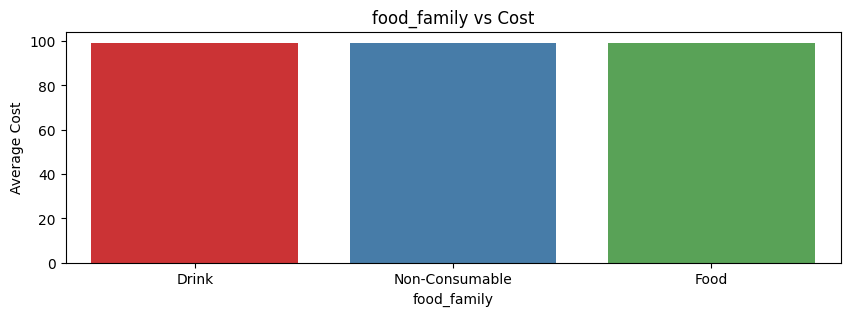

In [76]:
food_category_group = media_data.groupby("food_family")["cost"].mean().reset_index().sort_values(by='cost')

plt.figure(figsize=(10, 3))
sns.barplot(data=food_category_group, x="food_family", y="cost",palette='Set1')
plt.xlabel("food_family")
plt.ylabel("Average Cost")
plt.title("food_family vs Cost")
plt.show()

conclusion: food product do not affect the costs

### impact of cost on store sales

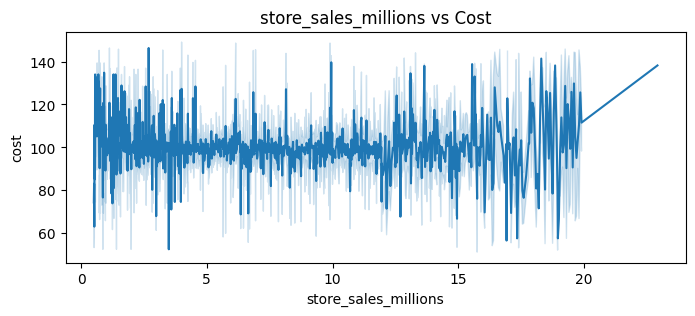

In [75]:
plt.figure(figsize=(8, 3))
sns.lineplot(data=media_data, x="store_sales_millions", y="cost", palette='viridis')
plt.xlabel("store_sales_millions")
plt.ylabel("cost")
plt.title("store_sales_millions vs Cost")
plt.show()

### promotion name on cost

In [25]:
media_data.promotion_name.nunique()

49

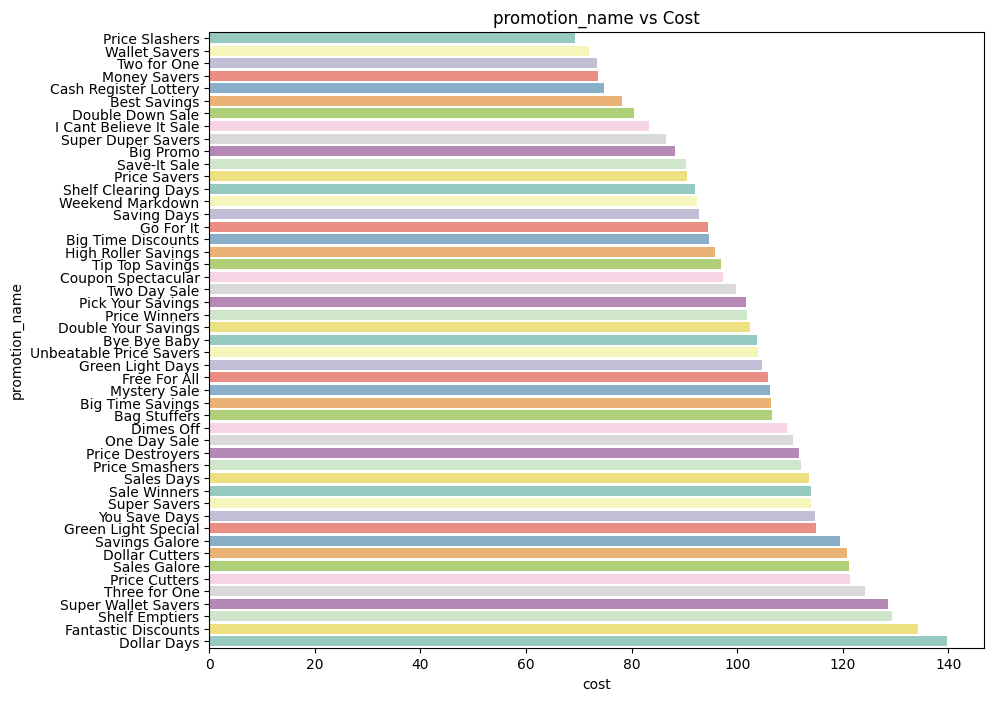

In [74]:
promotion_name_group = media_data.groupby("promotion_name")["cost"].mean().reset_index().sort_values(by='cost')
plt.figure(figsize=(10, 8))
sns.barplot(data=promotion_name_group, x="cost", y="promotion_name", palette='Set3')
plt.xlabel("cost")
plt.ylabel("promotion_name")
plt.title("promotion_name vs Cost")
plt.show()

it can be seen that promotion name affects the cost.

### sales country

In [27]:
media_data.sales_country.value_counts()

sales_country
USA       38892
Mexico    17572
Canada     3964
Name: count, dtype: int64

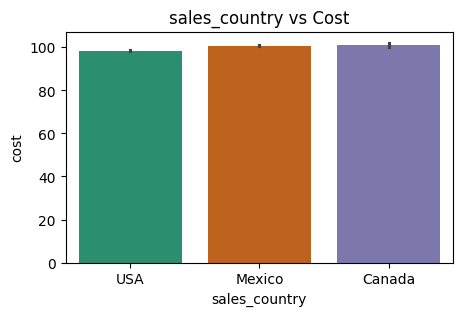

In [73]:
plt.figure(figsize=(5, 3))
sns.barplot(data=media_data, x="sales_country", y="cost", palette='Dark2')
plt.xlabel("sales_country")
plt.ylabel("cost")
plt.title("sales_country vs Cost")
plt.show()

country doesnot affect the cost of media

### customer data

In [29]:
customer_data = [
    "marital_status",
    "gender",
    "total_children",
    "education",
    "member_card",
    "occupation",
    "houseowner",
    "avg_cars_at home_approx",
    "avg_yearly_income",
    "num_children_at_home",
    "cost"
]

cust_data = media_data[customer_data].reset_index()
cust_data.head(2)

,index,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home_approx,avg_yearly_income,num_children_at_home,cost
0,0,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,126.62
1,1,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,59.86


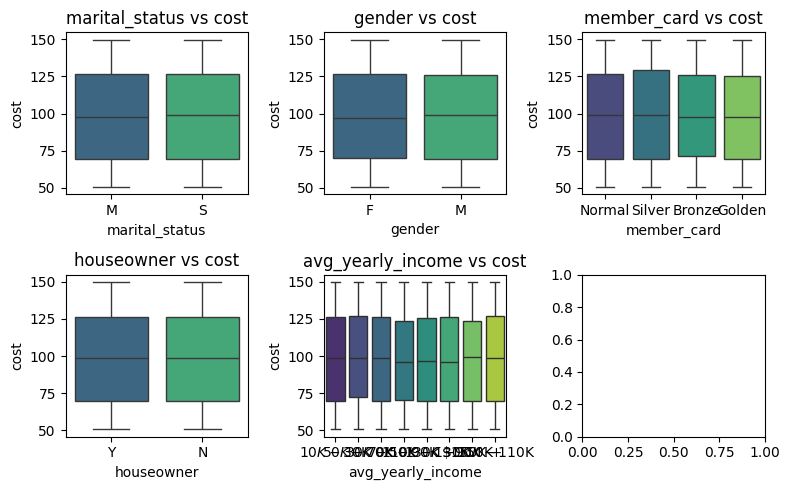

In [70]:
columns = [
    "marital_status",
    "gender",
    "member_card",
    "houseowner",
    "avg_yearly_income"
]

fig, axes = plt.subplots(2, 3, figsize=(8, 5))
axes = axes.flatten()
for i, col in enumerate(columns):
    sns.boxplot(x=col, y="cost", data=cust_data, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} vs cost')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('cost')

plt.tight_layout()
plt.show()

nothing affects cost

### product_data

In [31]:
product_data = [
    "brand_name",
    "SRP",
    "gross_weight",
    "net_weight",
    "recyclable_package",
    "low_fat",
    "units_per_case",
    "cost"
]
product_data = media_data[product_data]
product_data.head(2)

,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cost
0,Carrington,1.84,19.7,17.7,1.0,0.0,17.0,126.62
1,Carrington,1.84,19.7,17.7,1.0,0.0,17.0,59.86


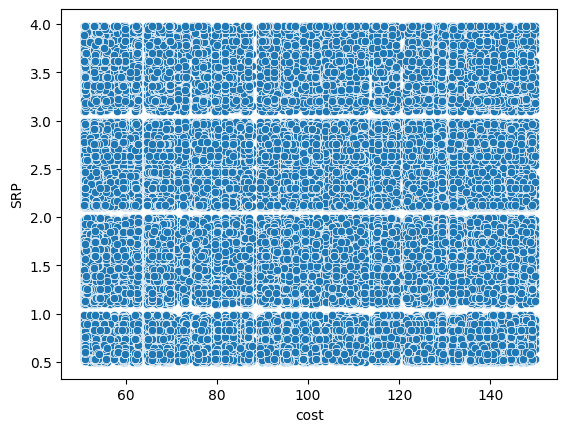

In [32]:
sns.scatterplot(x="cost", y="SRP", data=product_data)
plt.show()

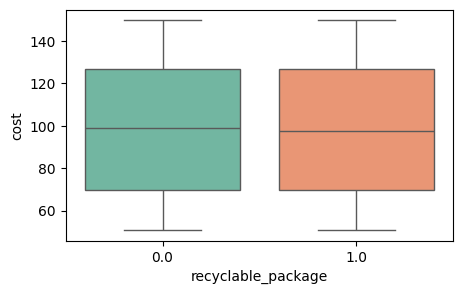

In [69]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='recyclable_package', y='cost', data=product_data, palette='Set2')
plt.show()

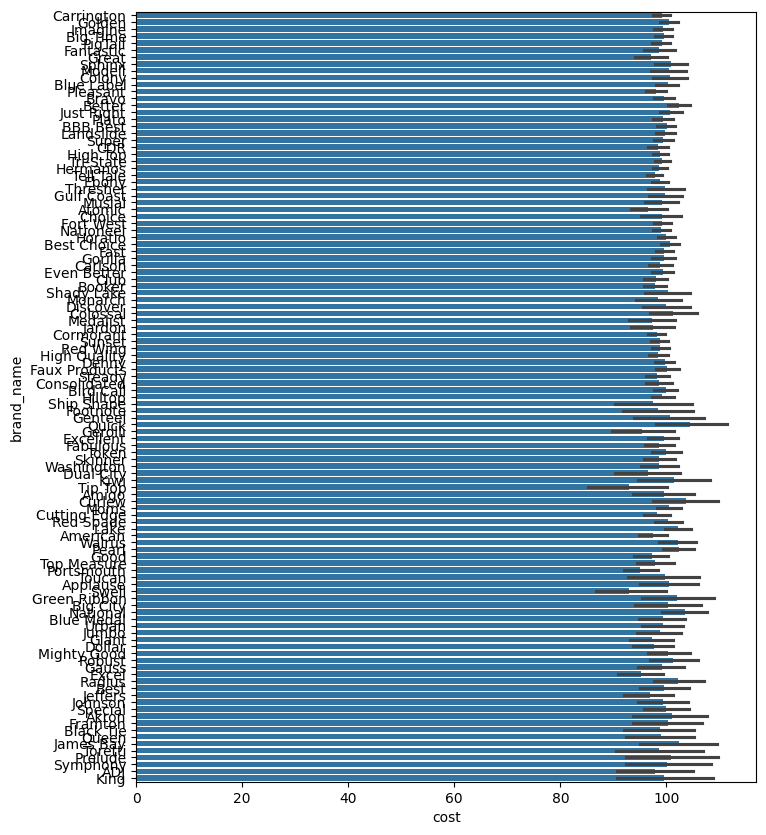

In [34]:
plt.figure(figsize=(8, 10))
sns.barplot(x='cost', y='brand_name', data=product_data)
plt.show()

In [35]:
media_data.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales_millions', 'store_cost_millions', 'unit_sales_millions',
       'promotion_name', 'sales_country', 'marital_status', 'gender',
       'total_children', 'education', 'member_card', 'occupation',
       'houseowner', 'avg_cars_at home_approx', 'avg_yearly_income',
       'num_children_at_home', 'avg_cars_at_home_approx_1', 'brand_name',
       'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat',
       'units_per_case', 'store_type', 'store_city', 'store_state',
       'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar',
       'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type',
       'cost'],
      dtype='object')

## store data

In [36]:
store_data=['store_type', 'store_city', 'store_state',
       'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar',
       'video_store', 'salad_bar', 'prepared_food', 'florist', 'cost']

store_data = media_data[store_data]
store_data.head(2)

,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,126.62
1,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,59.86


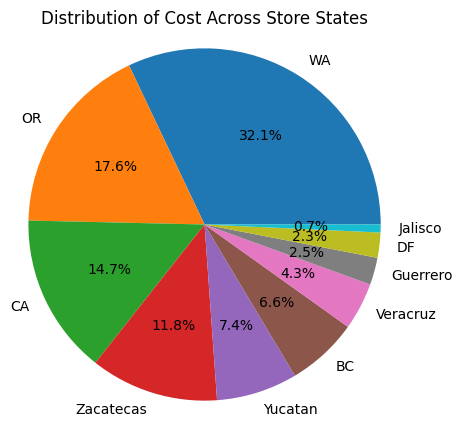

In [81]:
store_state_counts = store_data['store_state'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(store_state_counts, labels=store_state_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Cost Across Store States')
plt.axis('equal')
plt.show()

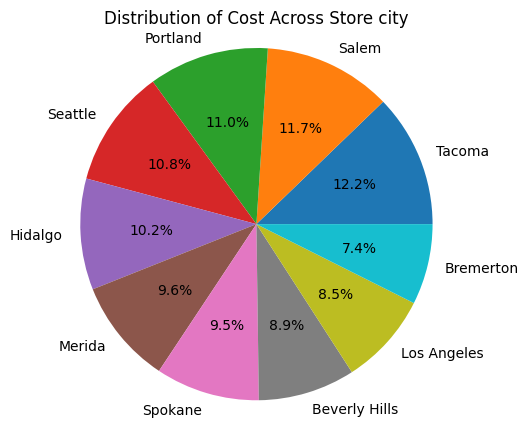

In [38]:
store_state_counts = store_data['store_city'].value_counts()[:10]
plt.figure(figsize=(5, 5))
plt.pie(store_state_counts, labels=store_state_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Cost Across Store city')
plt.axis('equal')
plt.show()

In [39]:
store_data.store_type.value_counts()

store_type
Supermarket            26192
Deluxe Supermarket     22954
Gourmet Supermarket     6503
Mid-Size Grocery        2846
Small Grocery           1933
Name: count, dtype: int64

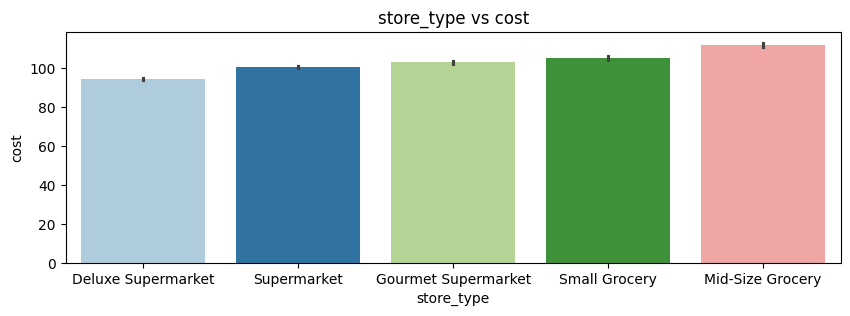

In [68]:
plt.figure(figsize=(10, 3))
sns.barplot(y='cost', x='store_type', data=store_data, palette='Paired')
plt.title('store_type vs cost')
plt.show()

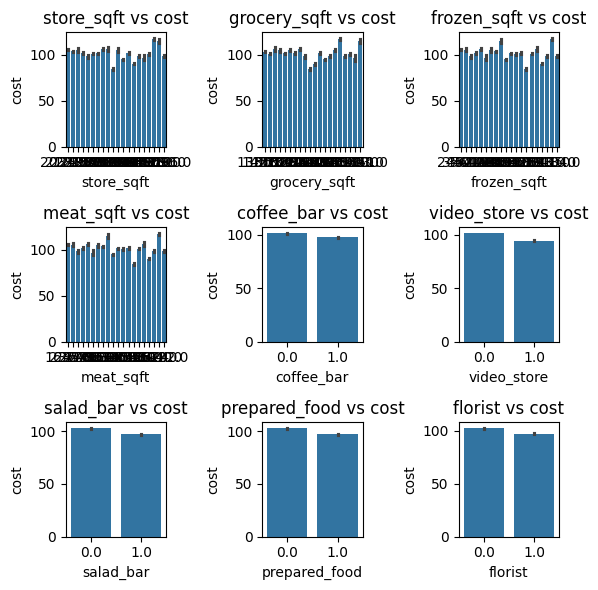

In [41]:
columns = [
    "store_sqft",
    "grocery_sqft",
    "frozen_sqft",
    "meat_sqft",
    "coffee_bar",
    "video_store",
    "salad_bar",
    "prepared_food",
    "florist"
]

fig, axes = plt.subplots(3, 3, figsize=(6,6))

# Flatten the axes array
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.barplot(x=col, y='cost', data=store_data, ax=axes[i])
    axes[i].set_title(f'{col} vs cost')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('cost')

plt.tight_layout()
plt.show()


it seems some relationship with store data on cost

In [42]:
media_data.media_type.value_counts()

media_type
Daily Paper, Radio         6820
Product Attachment         5371
Daily Paper, Radio, TV     5284
Daily Paper                5119
Street Handout             5069
Radio                      4980
Sunday Paper               4859
In-Store Coupon            4495
Sunday Paper, Radio        4050
Cash Register Handout      4002
TV                         3576
Bulk Mail                  3457
Sunday Paper, Radio, TV    3346
Name: count, dtype: int64

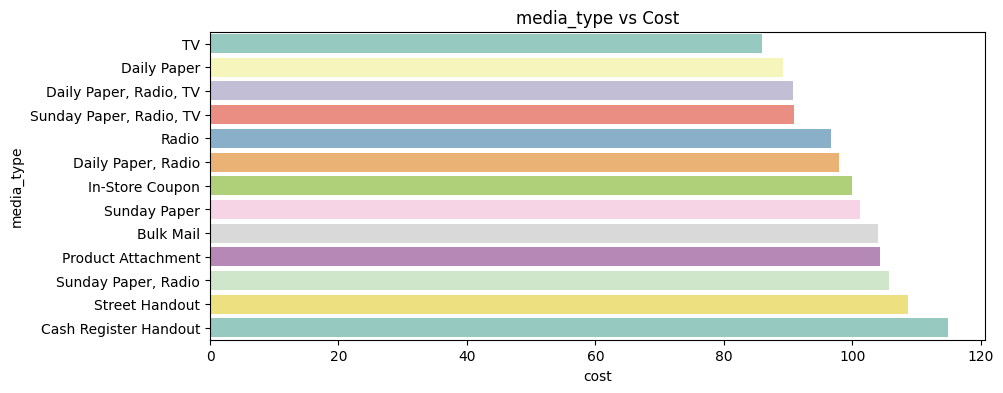

In [67]:
promotion_name_group = media_data.groupby("media_type")["cost"].mean().reset_index().sort_values(by='cost')
plt.figure(figsize=(10, 4))
sns.barplot(data=promotion_name_group, x="cost", y="media_type", palette='Set3')
plt.xlabel("cost")
plt.ylabel("media_type")
plt.title("media_type vs Cost")
plt.show()

this can affect cost

### correlation matrix

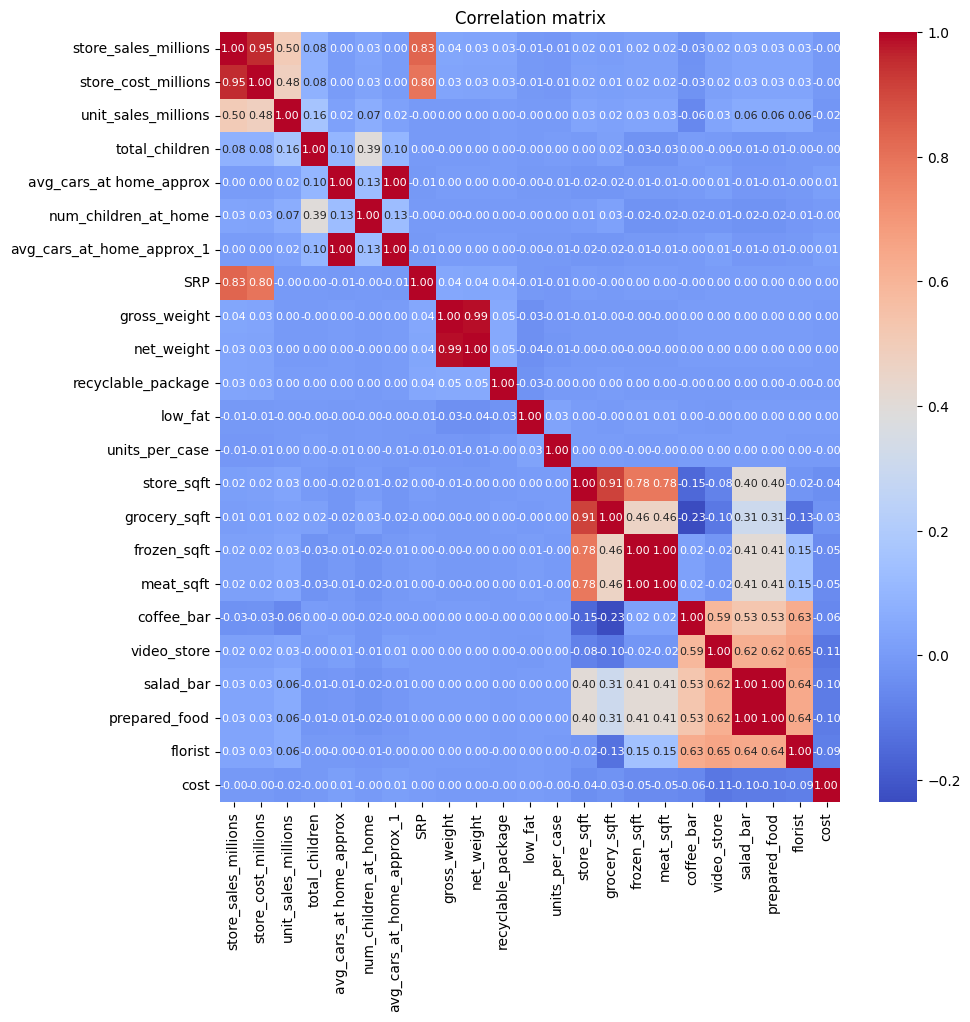

In [44]:
numeric_data = media_data.select_dtypes(include=['number'])
corr = numeric_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f",annot_kws={"size": 8})
plt.title('Correlation matrix')
plt.show()

## feature selection on categorical features

In [45]:
media_data.columns[media_data.dtypes == 'object']

Index(['food_category', 'food_department', 'food_family', 'promotion_name',
       'sales_country', 'marital_status', 'gender', 'education', 'member_card',
       'occupation', 'houseowner', 'avg_yearly_income', 'brand_name',
       'store_type', 'store_city', 'store_state', 'media_type'],
      dtype='object')

In [46]:
from scipy.stats import chi2_contingency

categorical_columns = ['promotion_name',
                       'member_card', 'avg_yearly_income',
                       'brand_name','media_type']

chi2_results = {}
for column in categorical_columns:
    observed = pd.crosstab(media_data[column], media_data['cost'])
    chi2, p, _, _ = chi2_contingency(observed)
    chi2_results[column] = {'chi2_statistic': chi2, 'p_value': p}

for column, results in chi2_results.items():
    print(f"Variable: {column}")
    print(f"P-value: {results['p_value']}")
    print("")

significant_variables = [column for column, results in chi2_results.items() if results['p_value'] < 0.05]
print("Statistically significant variables:")
print(significant_variables)


Variable: promotion_name
P-value: 0.0

Variable: member_card
P-value: 0.0

Variable: avg_yearly_income
P-value: 0.0

Variable: brand_name
P-value: 0.9999975960663122

Variable: media_type
P-value: 0.0

Statistically significant variables:
['promotion_name', 'member_card', 'avg_yearly_income', 'media_type']


In [47]:
media_data.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales_millions', 'store_cost_millions', 'unit_sales_millions',
       'promotion_name', 'sales_country', 'marital_status', 'gender',
       'total_children', 'education', 'member_card', 'occupation',
       'houseowner', 'avg_cars_at home_approx', 'avg_yearly_income',
       'num_children_at_home', 'avg_cars_at_home_approx_1', 'brand_name',
       'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat',
       'units_per_case', 'store_type', 'store_city', 'store_state',
       'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar',
       'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type',
       'cost'],
      dtype='object')

In [48]:
columns_to_drop = ['food_category', 'food_department', 'food_family','sales_country',
                   'marital_status', 'gender','unit_sales_millions',
                   'total_children', 'education', 'member_card', 'occupation',
                   'houseowner', 'avg_cars_at home_approx','num_children_at_home',
                   'avg_cars_at_home_approx_1', 'brand_name','low_fat','meat_sqft']

media_data2 = media_data.drop(columns=columns_to_drop)

In [49]:
media_data2.shape

(60428, 22)

In [50]:
media_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store_sales_millions  60428 non-null  float64
 1   store_cost_millions   60428 non-null  float64
 2   promotion_name        60428 non-null  object 
 3   avg_yearly_income     60428 non-null  object 
 4   SRP                   60428 non-null  float64
 5   gross_weight          60428 non-null  float64
 6   net_weight            60428 non-null  float64
 7   recyclable_package    60428 non-null  float64
 8   units_per_case        60428 non-null  float64
 9   store_type            60428 non-null  object 
 10  store_city            60428 non-null  object 
 11  store_state           60428 non-null  object 
 12  store_sqft            60428 non-null  float64
 13  grocery_sqft          60428 non-null  float64
 14  frozen_sqft           60428 non-null  float64
 15  coffee_bar         

### data preprocessing

In [51]:
media_data2.columns[media_data2.dtypes == 'object']

Index(['promotion_name', 'avg_yearly_income', 'store_type', 'store_city',
       'store_state', 'media_type'],
      dtype='object')

In [52]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['promotion_name', 'avg_yearly_income', 'store_type', 'store_city', 'store_state', 'media_type']

label_encoder = LabelEncoder()

for column in columns_to_encode:
    media_data2[column] = label_encoder.fit_transform(media_data2[column])

media_data2.head()

,store_sales_millions,store_cost_millions,promotion_name,avg_yearly_income,SRP,gross_weight,net_weight,recyclable_package,units_per_case,store_type,...,store_sqft,grocery_sqft,frozen_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,7.36,2.7232,0,0,1.84,19.70,17.70,1.0,17.0,0,...,27694.0,18670.0,5415.0,1.0,1.0,1.0,1.0,1.0,3,126.62
1,5.52,2.5944,6,5,1.84,19.70,17.70,1.0,17.0,0,...,27694.0,18670.0,5415.0,1.0,1.0,1.0,1.0,1.0,3,59.86
2,3.68,1.3616,18,0,1.84,19.70,17.70,1.0,17.0,0,...,27694.0,18670.0,5415.0,1.0,1.0,1.0,1.0,1.0,3,84.16
3,3.68,1.1776,6,4,1.84,19.70,17.70,1.0,17.0,0,...,27694.0,18670.0,5415.0,1.0,1.0,1.0,1.0,1.0,5,95.78
4,4.08,1.4280,11,4,1.36,7.12,5.11,0.0,29.0,0,...,27694.0,18670.0,5415.0,1.0,1.0,1.0,1.0,1.0,7,50.79


In [53]:
media_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store_sales_millions  60428 non-null  float64
 1   store_cost_millions   60428 non-null  float64
 2   promotion_name        60428 non-null  int64  
 3   avg_yearly_income     60428 non-null  int64  
 4   SRP                   60428 non-null  float64
 5   gross_weight          60428 non-null  float64
 6   net_weight            60428 non-null  float64
 7   recyclable_package    60428 non-null  float64
 8   units_per_case        60428 non-null  float64
 9   store_type            60428 non-null  int64  
 10  store_city            60428 non-null  int64  
 11  store_state           60428 non-null  int64  
 12  store_sqft            60428 non-null  float64
 13  grocery_sqft          60428 non-null  float64
 14  frozen_sqft           60428 non-null  float64
 15  coffee_bar         

### machine learning

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
X = media_data2.drop(columns=['cost'])
y = media_data2['cost']

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)
scaled_df.head(2)

,store_sales_millions,store_cost_millions,promotion_name,avg_yearly_income,SRP,gross_weight,net_weight,recyclable_package,units_per_case,store_type,...,store_state,store_sqft,grocery_sqft,frozen_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type
0,0.236490,0.071398,-1.837983,-1.565474,-0.295082,1.274931,1.260683,0.888809,-0.181381,-1.103089,...,-0.118067,-0.051654,-0.116317,0.064819,0.79515,1.35041,0.837143,0.837143,0.881732,-0.799025
1,-0.294838,-0.017247,-1.405947,0.709654,-0.295082,1.274931,1.260683,0.888809,-0.181381,-1.103089,...,-0.118067,-0.051654,-0.116317,0.064819,0.79515,1.35041,0.837143,0.837143,0.881732,-0.799025


In [57]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2_score(y_test, y_pred)

Mean Squared Error: 874.0159043575613


0.03265639193309511

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("r2score:", r2_score(y_test, y_pred))

Mean Squared Error: 3.6685459291742517
r2score: 0.9959397255384099


In [61]:
feature_importances = model.feature_importances_
print("Feature Importances:")

for feature, importance in zip(X.columns, feature_importances):
    if importance > 0.01:
      print(f"{feature}: {importance}")

Feature Importances:
promotion_name: 0.4403286541706547
store_type: 0.03244869554025089
store_city: 0.05363253175293713
store_state: 0.04528384687375895
store_sqft: 0.06095150057914816
grocery_sqft: 0.01936213238637577
frozen_sqft: 0.06502338022409714
coffee_bar: 0.012790553632672539
video_store: 0.014276044454833962
florist: 0.01296718184945603
media_type: 0.2392376787771946


In [62]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("r2score:", r2_score(y_test, y_pred))

Mean Squared Error: 1.8679046257893408
r2score: 0.9979326399082359


In [63]:
feature_importances = model.feature_importances_
print("Feature Importances:")

for feature, importance in zip(X.columns, feature_importances):
    if importance > 0.01:
      print(f"{feature}: {importance}")

Feature Importances:
promotion_name: 0.42887864184393765
store_type: 0.03307145048864102
store_city: 0.053054986743568316
store_state: 0.044628819438460726
store_sqft: 0.04690461473948797
grocery_sqft: 0.044780922928985376
frozen_sqft: 0.07196049809487233
coffee_bar: 0.010790598111637252
video_store: 0.012849065545358944
florist: 0.014471076693616067
media_type: 0.2279188812475027


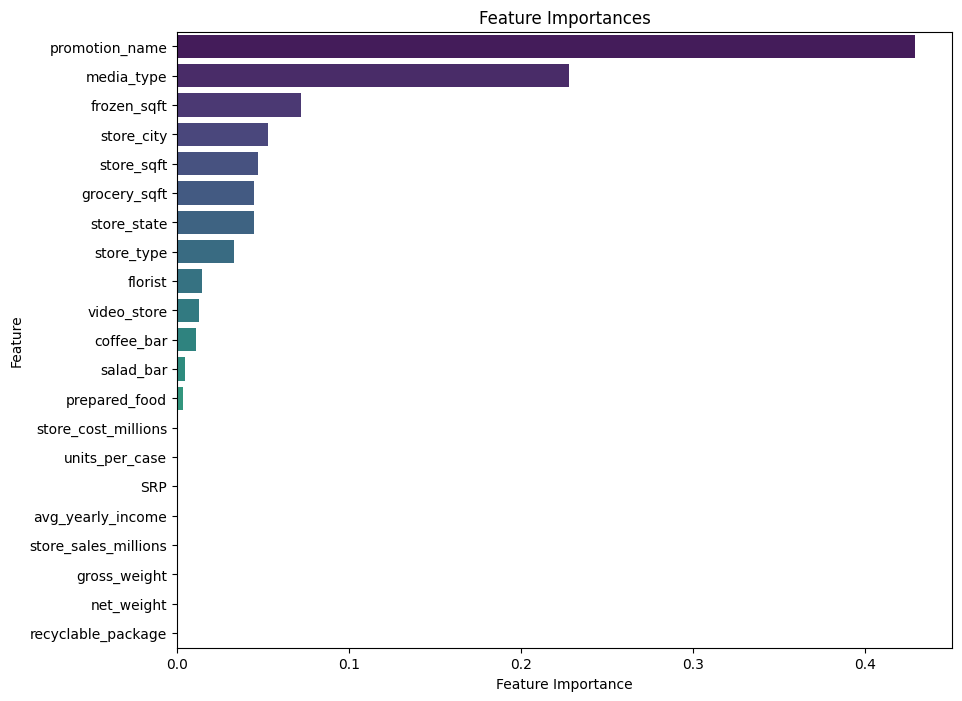

In [65]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()